In [1]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [2]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 20
generations = 20
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size)

# Run optimzation and write to file
solution = ga.solve_tsp(tsp_data)
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

IndexError: list index out of range

### Part 2: Path Finding Through Ant Colony Optimization

In [18]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData
# Please keep your parameters for the ACO easily changeable here
gen = 2500
no_gen = 20
q = 1600
evap = 0.2
alpha = 0.3
beta = 1
random_start = 0
toxic_start = 0.1
convergance = 100

# Construct the optimization objects
maze = Maze.create_maze("./../data/medium_maze.txt")
spec = PathSpecification.read_coordinates("./../data/medium_coordinates.txt")
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route, colony_history = aco.find_shortest_route(spec, alpha=alpha, beta=beta, random_start=random_start, toxic_start=toxic_start, convergence=convergance)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
print(shortest_route)
shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

Ready reading maze file ./../data/medium_maze.txt
Time taken: 116.812
3;
3;
3;
3;
3;
3;
2;
3;
3;
3;
0;
3;
3;
3;
3;
0;
1;
0;
0;
3;
3;
3;
3;
3;
3;
0;
0;
0;
1;
1;
1;
1;
0;
0;
0;
1;
0;
3;
0;
1;
0;
1;
1;
0;
0;
0;
0;
3;
0;
3;
3;
3;
0;
3;
3;
3;
3;
0;
0;
0;
0;
0;
0;
0;
0;
0;
1;
1;
0;
3;
3;
0;
0;
3;
3;
0;
1;
0;
3;
0;
3;
2;
3;
0;
3;
2;
3;
3;
2;
2;
2;
2;
2;
2;
2;
2;
2;
3;
3;
2;
2;
3;
0;
0;
3;
3;
3;
3;
3;
3;
3;
3;
3;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
1;
1;
1;
0;
0;
0;
0;
0;
0;
0;
0;
1;
1;
1;
1;
1;
1;
1;
1;
1;
1;
2;
2;
1;
1;
1;
2;
2;
2;
1;

Route size: 157


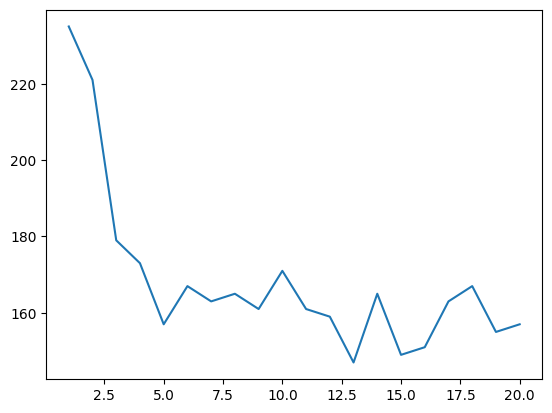

In [19]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(range(1, history.generations + 1), history.shortest)

plot_history(history=colony_history)

### Synthesis

In [2]:
import numpy as np

print(np.minimum(np.array([1, 3, 2]), np.array([0.3, 4, 1.9])))

[0.3 3.  1.9]


In [ ]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 1
no_gen = 1
q = 1000
evap = 0.1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")